<a href="https://colab.research.google.com/github/AgunsBaba/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [404]:
#import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [405]:
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [406]:
#check row and column length
df.shape

(8523, 12)

In [407]:
#Check column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [408]:
len(df.Outlet_Identifier.unique())

10

In [409]:
#get descriptive stats
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [410]:
#import visualization modules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


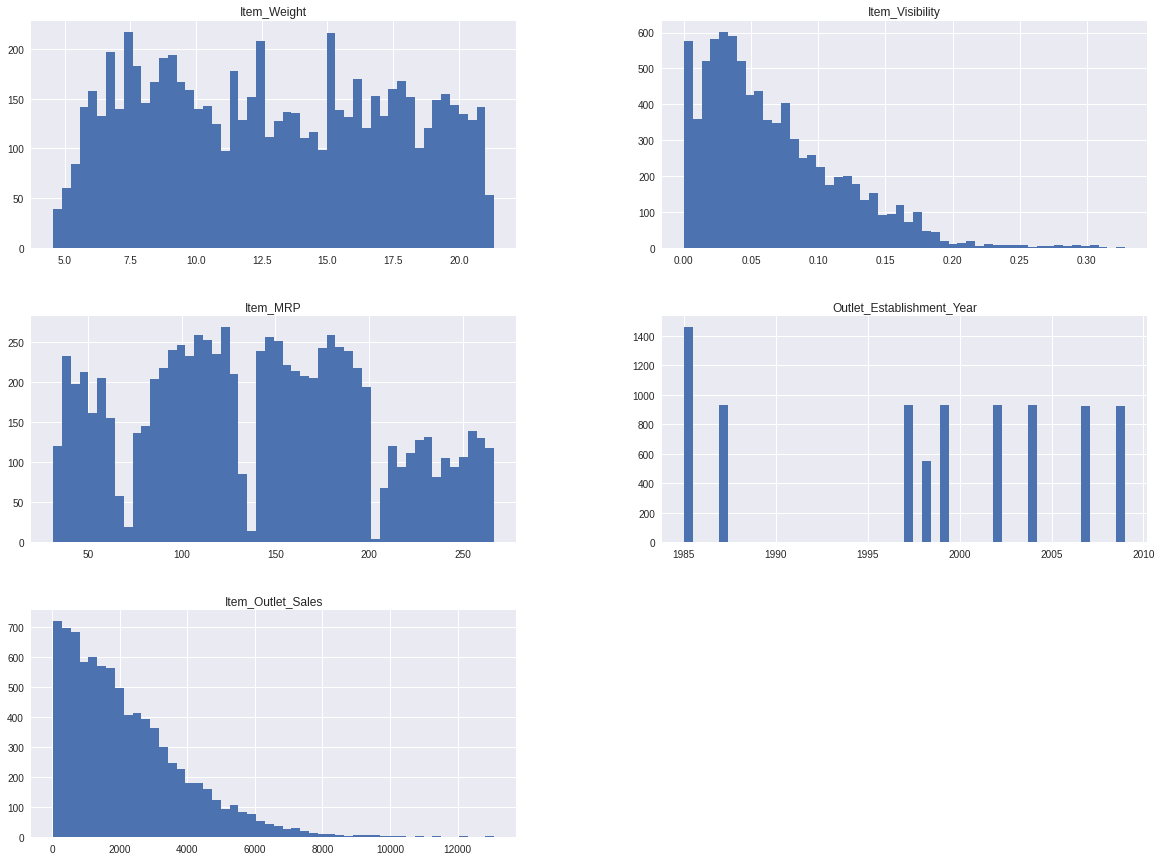

In [411]:
#show histogram of data to see the distribution of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

In [412]:
#find duplicates

df_duplicated = df[df.duplicated()]
print(df_duplicated)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


Nothing is duplicated

In [413]:
#Addressing missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

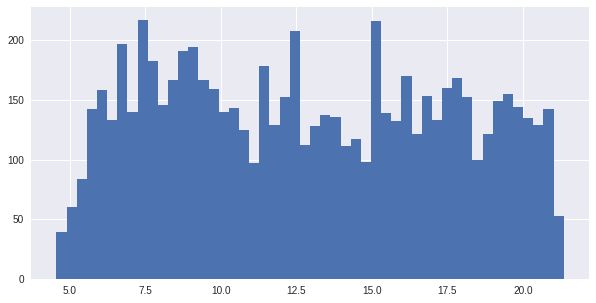

In [414]:
#check the distribution of the Item_Weight column after filling null values
df['Item_Weight'].hist(bins=50, figsize=(10,5))
plt.show()

In [415]:
#check value counts for the 'Outlet_Size'
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Looking at the data, there are 3,894 medium stores and 3,326 small stores. It is therefore probably true that the null values in the Outlet_Size columns are for High stores, since 2410 + 1303 = 3,713 a number which closely aligns with the number of medium and small stores

In [416]:
#Fill Outlet_Size null values 'High'
df['Outlet_Size'].fillna('High', inplace=True)

In [417]:
#check that all null values in Outlet_Size have been filled
df['Outlet_Size'].isnull().sum()

0

Result shows there are no more null values

In [418]:
#Get descriptive statistics of the 'cleaned' dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [419]:
#histogram of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


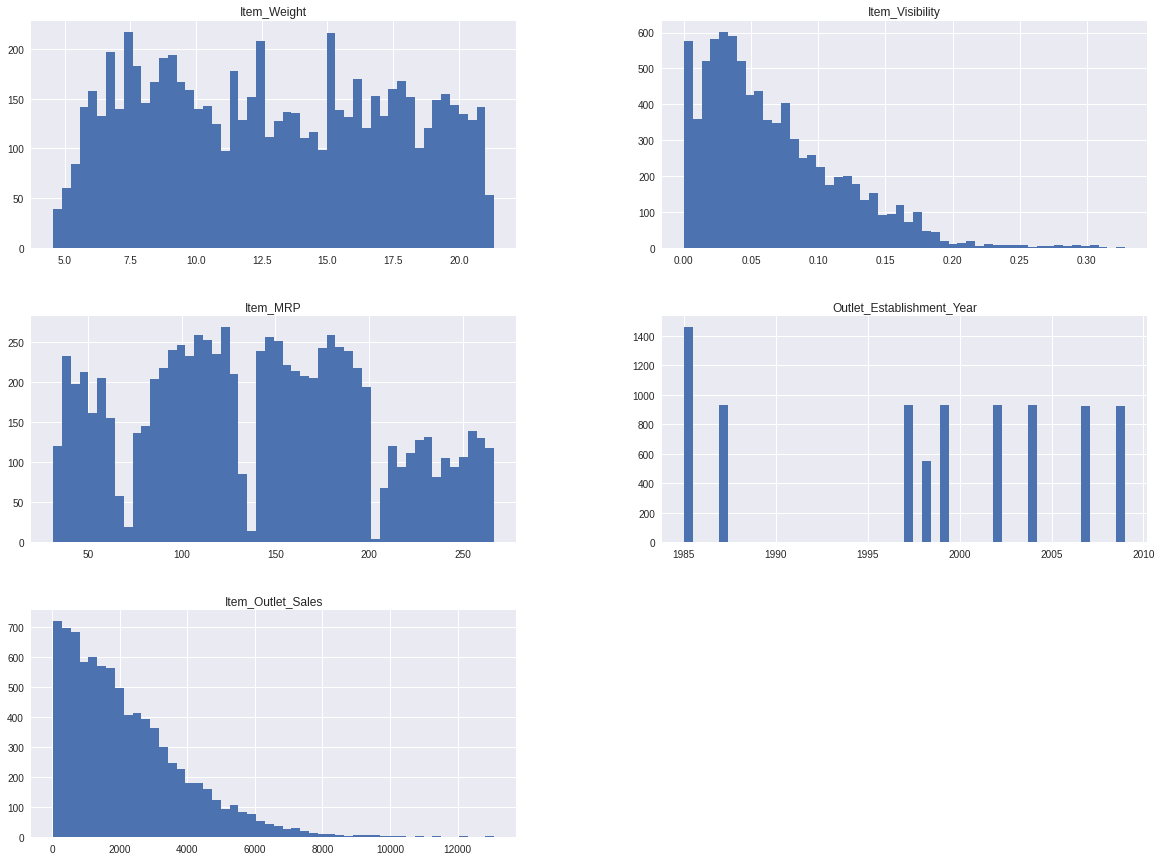

In [420]:
#show histogram of data to see the distribution of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


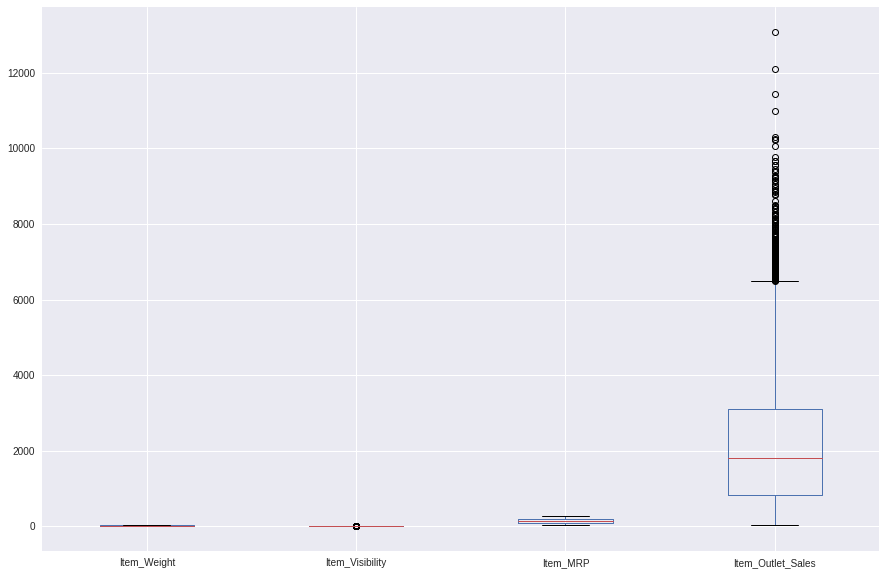

In [421]:
#boxplot
df.boxplot(column=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], figsize=(15,10))
plt.show()

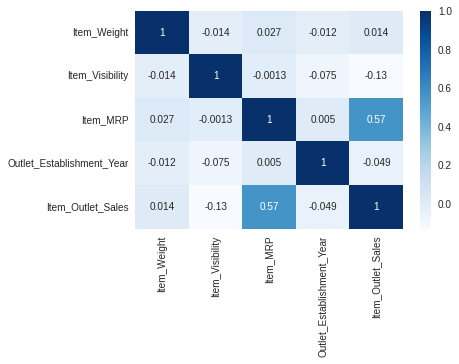

In [422]:
#correlation
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [424]:
#plot item weight and fat content
total_sale_outlet = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
total_sale_outlet

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [425]:
#Put the Outlet and total sales in a list
outlet = list(total_sale_outlet.index)
sales = list((total_sale_outlet.values)/1000000)


Text(0.5, 1.0, 'Total Sales by Outlet')

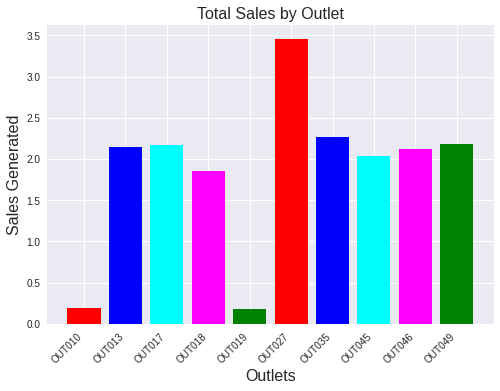

In [426]:
#create a bar chart to view the total sales by outlet
plt.style.use('seaborn')
plt.bar(outlet, sales, color=['red', 'blue', 'cyan', 'magenta', 'green']) #make bars in different colors
plt.xticks(rotation=45, ha='right') #rotate x-axis markers
plt.xlabel('Outlets', fontsize=16) #create x-axis labels
plt.ylabel('Sales Generated', fontsize=16) #create y-axis labels
plt.title('Total Sales by Outlet', fontsize=16) #create a title for the chart

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [428]:
#based on the data dictionary, Outlet_Identifier and Item_Identifier will not add any predictive value so those columns can be dropped
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [429]:
#separate data into features and target
X = df.drop('Item_Outlet_Sales', axis= 1)
y = df['Item_Outlet_Sales']

In [430]:
#create training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [431]:
#create a pre-processing pipeline

#select columns
num_selector = make_column_selector(dtype_exclude=object)
cat_selector = make_column_selector(dtype_include=object)

#instantiate transformers
imputer = SimpleImputer(strategy='mean')
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

#make pipeline for each column type
num_pipe = make_pipeline(imputer)
cat_pipe = make_pipeline(one_hot)

#pre-processing pipeline tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#make column transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

#instantiate the models
lin_reg = LinearRegression()
dec_tree = DecisionTreeRegressor(random_state=42)

#create a pipeline with the transformers and the models
lin_reg_pipe = make_pipeline(column_transformer, lin_reg)
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)

1. Linear Regression

In [432]:
#fit linear regression model on training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6074d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6076d0>)])),
                ('linearregression', Li

In [433]:
# evaluate Linear Regression model R2 and RMSE scores
print(f'Train R2 for LR: {r2_score(y_train, lin_reg_pipe.predict(X_train))}')
print(f'Test R2 for LR: {r2_score(y_test, lin_reg_pipe.predict(X_test))}')
print(f'Train RMSE for LR: {np.sqrt(mean_squared_error(y_train, lin_reg_pipe.predict(X_train)))}')
print(f'Test RMSE for LR: {np.sqrt(mean_squared_error(y_test, lin_reg_pipe.predict(X_test)))}')

Train R2 for LR: 0.5591646460669037
Test R2 for LR: 0.5780148147929751
Train RMSE for LR: 1141.9339397238627
Test RMSE for LR: 1070.9542949857419


2. Decision Tree

In [434]:
#fit regression tree model on training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6074d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6076d0>)])),
                ('decisiontreeregressor

In [435]:
# evaluate Regression Tree model R2 and RMSE scores
print(f'Train R2 for Decision Tree: {r2_score(y_train, dec_tree_pipe.predict(X_train))}')
print(f'Test R2 for Decision Tree: {r2_score(y_test, dec_tree_pipe.predict(X_test))}')
print(f'Train RMSE for Decision Tree: {np.sqrt(mean_squared_error(y_train, dec_tree_pipe.predict(X_train)))}')
print(f'Test RMSE for Decision Tree: {np.sqrt(mean_squared_error(y_test, dec_tree_pipe.predict(X_test)))}')

Train R2 for Decision Tree: 1.0
Test R2 for Decision Tree: 0.14240413142042696
Train RMSE for Decision Tree: 0.0
Test RMSE for Decision Tree: 1526.7350457932928


The Regression tree model seems to be overfitting on the training data based on the R2 and RMSE scores for the training data

In [436]:
#check the depth of decision tree
dec_tree.get_depth()

41

In [437]:
#find optimal depth for the decision tree by trying a range from 2 to 41 trees
max_depth_range = list(range(2, 41)) # will try every value between 2 and 41
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree_eval = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree_pipe_eval = make_pipeline(column_transformer, dec_tree_eval)
    dec_tree_pipe_eval.fit(X_train, y_train)
    score = dec_tree_pipe_eval.score(X_test, y_test)
    r2.append(score)

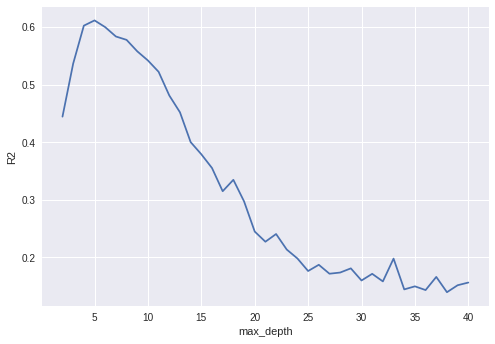

In [438]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Maximum R2 score seems to be when the max_depth is about 5. Next is to evaluate model by setting max_depth to 5

In [439]:
#instantiate regression tree model and model pipeline with max_depth = 5
dec_5_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
dec_5_tree_pipe = make_pipeline(column_transformer, dec_5_tree)

#fit the model
dec_5_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6074d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb20c6076d0>)])),
                ('decisiontreeregressor

In [440]:
#evaluate model
print(f'Train R2 for Decision Tree: {r2_score(y_train, dec_5_tree_pipe.predict(X_train))}')
print(f'Test R2 for Decision Tree: {r2_score(y_test, dec_5_tree_pipe.predict(X_test))}')
print(f'Train RMSE for Decision Tree: {np.sqrt(mean_squared_error(y_train, dec_5_tree_pipe.predict(X_train)))}')
print(f'Test RMSE for Decision Tree: {np.sqrt(mean_squared_error(y_test, dec_5_tree_pipe.predict(X_test)))}')

Train R2 for Decision Tree: 0.6006959204840103
Test R2 for Decision Tree: 0.6113841271778492
Train RMSE for Decision Tree: 1086.8125535742872
Test RMSE for Decision Tree: 1027.738444227293


This is a better regression tree model since the model is not overfitting the training data as observed earlier

**Model Recommendation**

---


Overall, I will recommend that the Decision Tree model (with a max_depth=5) be deployed.

From the model metrics, the RMSE of the decision tree model at USD1027.74 is lower than that of the linear regression model at USD1070.95. This means that the deviation of the predicted values from the actual values is smaller and therefore better with the decision tree model than with the linear regression model. 

Additionally, the R2 score on the test set for the decision tree model at 0.611 is higher than that of the linear regression model at 0.578. This means that decision tree model does a better job of explaining the variability in sales (target variable) given the independent variables than the linear regression model.